In [70]:
from simulation import *
%matplotlib inline

Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [33, 48, 35, 11, 21, 20, 18, 43, 5, 30] 
Slist :  [11]


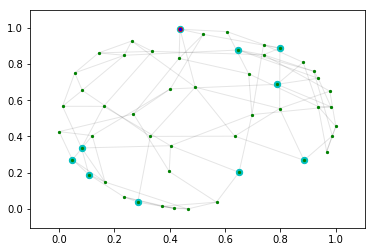

In [71]:
figureList = list()
# Parameters definition
numRumors = 1
maxThreshold = 1
numMonitors = 10
propagProba = 1
numNodes = 50
linkProba = 0.2
monitorTrigger = list()
numStep = 100



Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)

fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)

figureList.append(fig1)

Starting infection


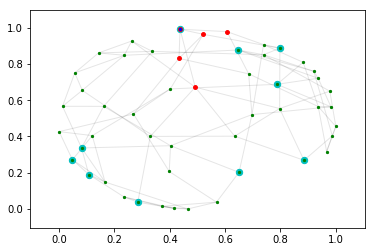

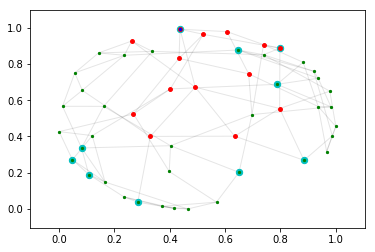

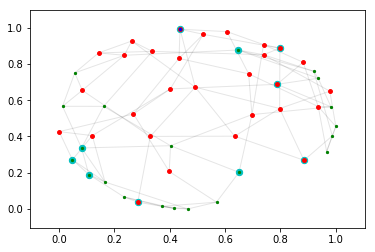

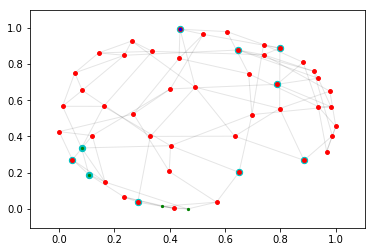

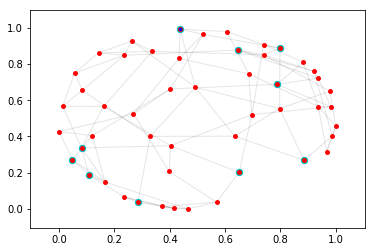

In [72]:
print("Starting infection")
infections = [[] for n in range(numRumors)]


j=0
infected = getInfectedList(Graph,numRumors)
while(len(infected)<len(Graph.nodes())):
#for j in range(5):
    #print("====================================================\n\n\n\n\n\n\n\n====================================================")

    #for i in Graph.nodes():
        #if i in monitorsList:
            #print("Node ",str(i),"\t",Graph.node[i])

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)

    
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)

    #print(monitorTrigger)
    #printMonitorTrig(monitorTrigger)

    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)

In [73]:
def findSet(myG,mySourceNode,myRadius):
    possible_set = list()
    curSet = findNeighDegN(myG,mySourceNode,myRadius)

    return  curSet

sets = list()
for i in range(len(monitorTrigger)):
    set1 =findSet(Graph,monitorTrigger[i][0],monitorTrigger[i][2])
    sets.append(set(set1))
    print(set1)
    
print(set.intersection(*sets))

[6, 3, 7]
[12, 9, 13, 46]
[17, 19, 16, 20]
[19, 21, 18, 49]
[20, 22, 19, 23, 6]
[31, 13, 8, 44]
[32, 34, 31, 26]
[34, 36, 37, 15]
[44, 41, 45]
[47, 49, 0]
set()


In [74]:
monitorTrigger

[(5, 1, 1),
 (11, 1, 1),
 (18, 1, 1),
 (20, 1, 1),
 (21, 1, 1),
 (30, 1, 1),
 (33, 1, 1),
 (35, 1, 1),
 (43, 1, 1),
 (48, 1, 1)]

In [75]:
rumorSources

[11]